In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

ENGINEERED_FEATURES = 'data/assets.h5'

data = pd.read_hdf(ENGINEERED_FEATURES, 'engineered_features')
data = data.drop(columns=["target_2w","target_3w","target_6w","target_12w"])

data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 13750 entries, ('IYR', Timestamp('2001-01-07 00:00:00')) to ('XLY', Timestamp('2024-12-15 00:00:00'))
Data columns (total 96 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   return_1w                                     13178 non-null  float64
 1   return_2w                                     13178 non-null  float64
 2   return_3w                                     13178 non-null  float64
 3   return_6w                                     13178 non-null  float64
 4   return_12w                                    13178 non-null  float64
 5   return_52w                                    13178 non-null  float64
 6   Mkt-RF                                        13750 non-null  float64
 7   SMB                                           13750 non-null  float64
 8   HML                                           13750 non-null

In [2]:
data.columns

Index(['return_1w', 'return_2w', 'return_3w', 'return_6w', 'return_12w',
       'return_52w', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'momentum_2',
       'momentum_3', 'momentum_6', 'momentum_12', 'momentum_52',
       'momentum_3_12', 'year', 'month', 'sector', 'return_1w_t-1',
       'return_1w_t-2', 'return_1w_t-3', 'return_1w_t-4', 'return_1w_t-5',
       'return_1w_t-6', 'target_1w', 'recession', 'yield_curve', 'corp_oas',
       'hy_oas', 'eu_hy_oas', 'sentiment', 'real_gdp', 'oil', 'inflacion',
       'leading', 'vix', 'weekjobclaims', 'retail_sales_percent',
       'retail_sales', '1y_yield', 'tot_bank_credit',
       'commercial_industrial_loans', 'lumber', 'cotton', 'wheat', 'corn',
       'coffee', 'energy_price', 'copper', 'natural_gas', 'business_inventory',
       'corporate_profits', 'semiconductor_electronics_manufacturing',
       'consumer_price_index', 'M2_money_supply', '10y_real_interest_rate',
       'new_homes', 'streaming_media_consumption', 'gold', 'recession_di

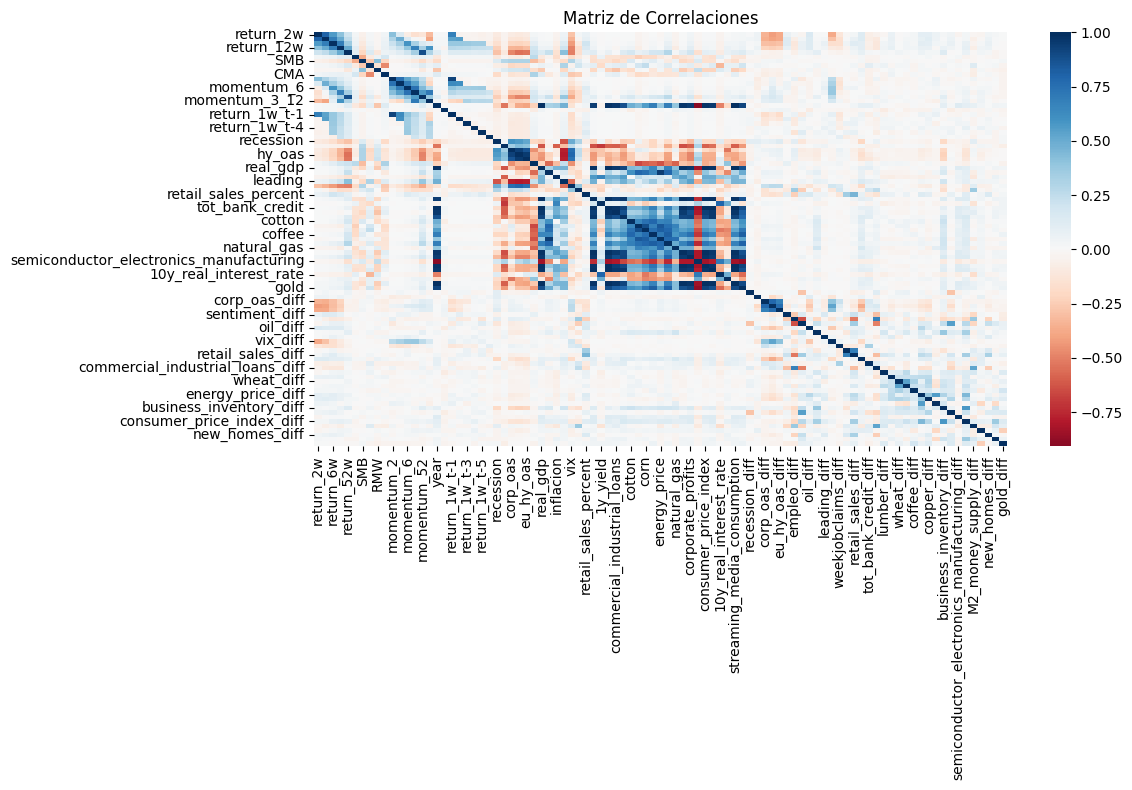


Correlaciones más altas:
streaming_media_consumption  tot_bank_credit         0.994362
                             real_gdp                0.992577
                             consumer_price_index    0.989342
consumer_price_index         business_inventory      0.988207
tot_bank_credit              real_gdp                0.987708
M2_money_supply              tot_bank_credit         0.986731
consumer_price_index         tot_bank_credit         0.985836
streaming_media_consumption  year                    0.985627
business_inventory           real_gdp                0.984830
streaming_media_consumption  business_inventory      0.982552
dtype: float64


In [3]:
# Quitamos la columna sector que no es numérica
columnas_conservar = ['return_1w', 'sector', 'target_1w', ]
data_num = data.drop(columns=columnas_conservar)
data_conservar = data.loc[:, columnas_conservar]

# Calculamos la matriz de correlaciones
def matriz_correlaciones(data):
    matriz_corr = data.corr()

    # Creamos un mapa de calor usando seaborn para visualizar mejor las correlaciones

    plt.figure(figsize=(12, 8))
    sns.heatmap(matriz_corr, cmap='RdBu', center=0, annot=False)
    plt.title('Matriz de Correlaciones')
    plt.tight_layout()
    plt.show()

    # También podemos ver las correlaciones más altas
    print("\nCorrelaciones más altas:")
    # Obtenemos el triángulo superior de la matriz
    triup = matriz_corr.where(np.triu(np.ones(matriz_corr.shape), k=1).astype(bool))
    # Ordenamos las correlaciones de mayor a menor
    correlaciones_ordenadas = triup.unstack().sort_values(ascending=False).dropna()
    print(correlaciones_ordenadas.head(10))

matriz_correlaciones(data_num)


In [4]:
def mostrar_y_eliminar_correlaciones(df, umbral=0.95):
    # Matriz de correlación
    corr_matrix = df.corr().abs()
    
    # Encuentra pares de columnas correlacionadas
    pares_correlacionados = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i,j] > umbral:
                col1 = corr_matrix.columns[i]
                col2 = corr_matrix.columns[j]
                pares_correlacionados.append((col1, col2, corr_matrix.iloc[i,j]))
    
    # Muestra los pares correlacionados
    print("Pares correlacionados:")
    for col1, col2, corr in pares_correlacionados:
        print(f"{col1} - {col2}: {corr:.3f}")
    
    # Decide qué columnas eliminar
    columnas_eliminar = set()
    for col1, col2, _ in pares_correlacionados:
        # Elimina la segunda columna de cada par
        columnas_eliminar.add(col2)
    
    return df.drop(columns=list(columnas_eliminar)), list(columnas_eliminar)

# Uso:
df_limpio, eliminadas = mostrar_y_eliminar_correlaciones(data_num, umbral=0.6)

Pares correlacionados:
return_2w - return_3w: 0.803
return_2w - return_1w_t-1: 0.681
return_3w - return_6w: 0.694
return_6w - return_12w: 0.693
return_12w - momentum_12: 0.678
return_52w - momentum_52: 0.884
momentum_2 - momentum_3: 0.741
momentum_2 - return_1w_t-1: 0.923
momentum_3 - momentum_6: 0.704
momentum_3 - return_1w_t-1: 0.630
momentum_3 - return_1w_t-2: 0.607
momentum_6 - momentum_12: 0.742
momentum_12 - momentum_3_12: 0.703
year - real_gdp: 0.980
year - retail_sales: 0.941
year - tot_bank_credit: 0.980
year - commercial_industrial_loans: 0.957
year - lumber: 0.875
year - coffee: 0.689
year - copper: 0.692
year - business_inventory: 0.966
year - corporate_profits: 0.944
year - semiconductor_electronics_manufacturing: 0.906
year - consumer_price_index: 0.972
year - M2_money_supply: 0.961
year - streaming_media_consumption: 0.986
year - gold: 0.914
recession - leading: 0.627
yield_curve - real_gdp: 0.630
yield_curve - inflacion: 0.600
yield_curve - retail_sales: 0.643
yield_cur

In [5]:
df_limpio.shape

(13750, 52)

In [6]:
data_conservar.shape

(13750, 3)

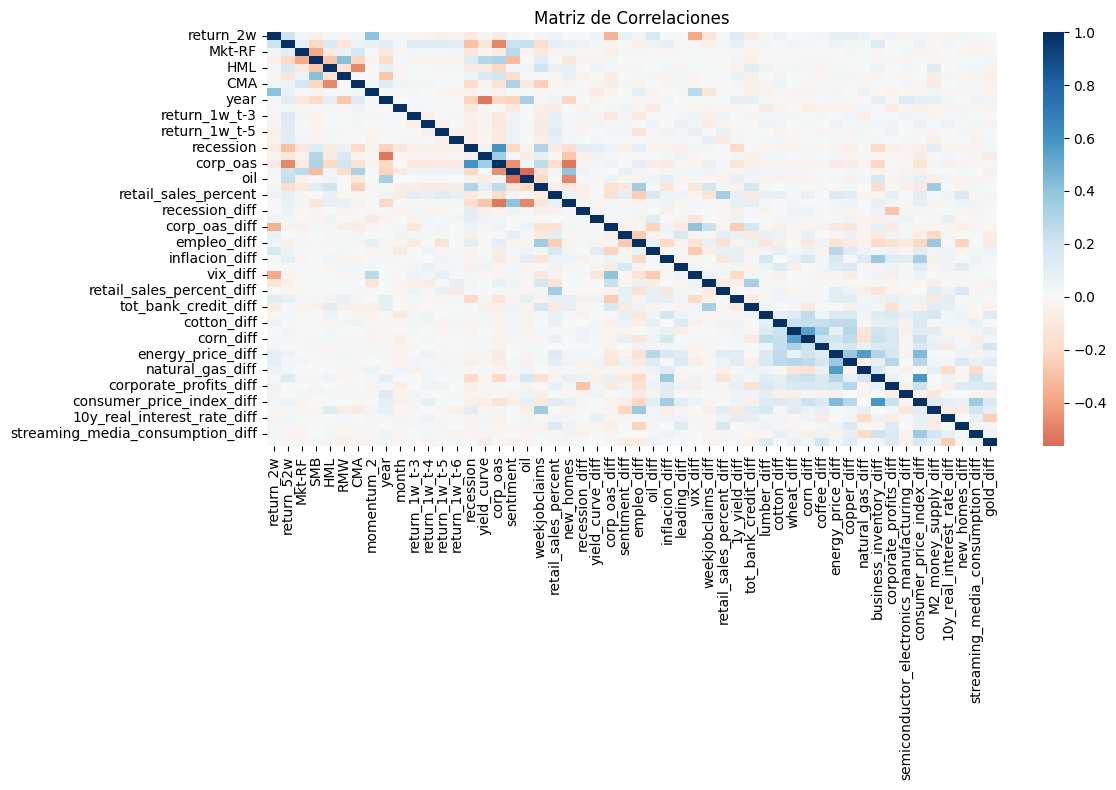


Correlaciones más altas:
corp_oas                   recession                  0.592569
consumer_price_index_diff  business_inventory_diff    0.583080
natural_gas_diff           energy_price_diff          0.558624
corn_diff                  wheat_diff                 0.543078
consumer_price_index_diff  energy_price_diff          0.441770
RMW                        SMB                        0.418262
momentum_2                 return_2w                  0.413251
vix_diff                   corp_oas_diff              0.400998
new_homes                  sentiment                  0.398844
business_inventory_diff    inflacion_diff             0.375605
dtype: float64


In [7]:
matriz_correlaciones(df_limpio)

In [8]:
df_limpio.shape

(13750, 52)

In [9]:
df_concatenado = pd.concat([data_conservar, df_limpio], axis=1)

df_concatenado.to_hdf('data/assets.h5', 'engineered_features_trimmed')

/tmp/ipykernel_60720/574084943.py:3: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  df_concatenado.to_hdf('data/assets.h5', 'engineered_features_trimmed')


In [10]:
# Imputamos los valores faltantes usando forward fill
df_concatenado_imputado = df_concatenado.fillna(method='ffill')

# Eliminamos las filas que aún tengan valores NaN después de la imputación
df_concatenado_limpio = df_concatenado_imputado.dropna()

print("Dimensiones originales:", df_concatenado.shape)
print("Dimensiones después de imputación y limpieza:", df_concatenado_limpio.shape)

# Actualizamos df_concatenado con los datos limpios
df_concatenado = df_concatenado_limpio


Dimensiones originales: (13750, 55)
Dimensiones después de imputación y limpieza: (13692, 55)


/tmp/ipykernel_60720/1508157407.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_concatenado_imputado = df_concatenado.fillna(method='ffill')


In [11]:
df_concatenado_limpio[df_concatenado_limpio.index.get_level_values('date').year < 2020]

return_1w sector  target_1w  return_2w  return_52w  \
ticker date                                                             
IYR    2002-02-17   0.855497    IYR   0.215295   0.402775    0.397535   
       2002-02-24   0.215295    IYR   0.458114   0.931425    0.516061   
       2002-03-03   0.458114    IYR   0.786332   0.585067    0.409574   
       2002-03-10   0.786332    IYR   0.185643   1.067878    0.513829   
       2002-03-17   0.185643    IYR   0.479877   0.830775    0.716629   
...                      ...    ...        ...        ...         ...   
XLY    2019-12-01   0.728140    XLY  -0.249349   0.260547    2.410236   
       2019-12-08  -0.249349    XLY   0.524742   0.347993    3.123284   
       2019-12-15   0.524742    XLY   0.501703   0.172434    3.440961   
       2019-12-22   0.501703    XLY   0.647421   0.695183    5.086605   
       2019-12-29   0.647421    XLY  -0.098124   0.781572    4.206877   

                      Mkt-RF        SMB        HML        RMW       CMA  ...  \
ticker date                                                              ...   
IYR    2002-02-17   4.375252  -0.777619   1.974940  -1.714827  2.685024  ...   
       2002-02-24   4.375252  -0.777619   1.974940  -1.714827  2.685024  ...   
       2002-03-03   4.375252  -0.777619   1.974940  -1.714827  2.685024  ...   
       2002-03-10   4.375252  -0.777619   1.974940  -1.714827  2.685024  ...   
       2002-03-17   4.375252  -0.777619   1.974940  -1.714827  2.685024  ...   
...                      ...        ...        ...        ...       ...  ...   
XLY    2019-12-01  14.460865 -27.831919   9.828657 -55.275294  4.657438  ...   
       2019-12-08  13.054054 -28.846380  13.755431 -60.955912 -4.476360  ...   
       2019-12-15  13.054054 -28.846380  13.755431 -60.955912 -4.476360  ...   
       2019-12-22  13.054054 -28.846380  13.755431 -60.955912 -4.476360  ...   
       2019-12-29  13.054054 -28.846380  13.755431 -60.955912 -4.476360  ...   

                   natural_gas_diff  business_inventory_diff  \
ticker date                                                    
IYR    2002-02-17          0.000000                      0.0   
       2002-02-24          0.000000                      0.0   
       2002-03-03          0.000000                  -3666.0   
       2002-03-10          0.000000                      0.0   
       2002-03-17          0.000000                      0.0   
...                             ...                      ...   
XLY    2019-12-01         -0.537471                  -2098.0   
       2019-12-08          0.000000                      0.0   
       2019-12-15          0.000000                      0.0   
       2019-12-22          0.000000                      0.0   
       2019-12-29          0.000000                      0.0   

                   corporate_profits_diff  \
ticker date                                 
IYR    2002-02-17                     0.0   
       2002-02-24                     0.0   
       2002-03-03                     0.0   
       2002-03-10                     0.0   
       2002-03-17                     0.0   
...                                   ...   
XLY    2019-12-01                     0.0   
       2019-12-08                     0.0   
       2019-12-15                     0.0   
       2019-12-22                     0.0   
       2019-12-29                     0.0   

                   semiconductor_electronics_manufacturing_diff  \
ticker date                                                       
IYR    2002-02-17                                           0.0   
       2002-02-24                                           0.0   
       2002-03-03                                           0.3   
       2002-03-10                                           0.0   
       2002-03-17                                           0.0   
...                                                         ...   
XLY    2019-12-01                                           0.1   
      

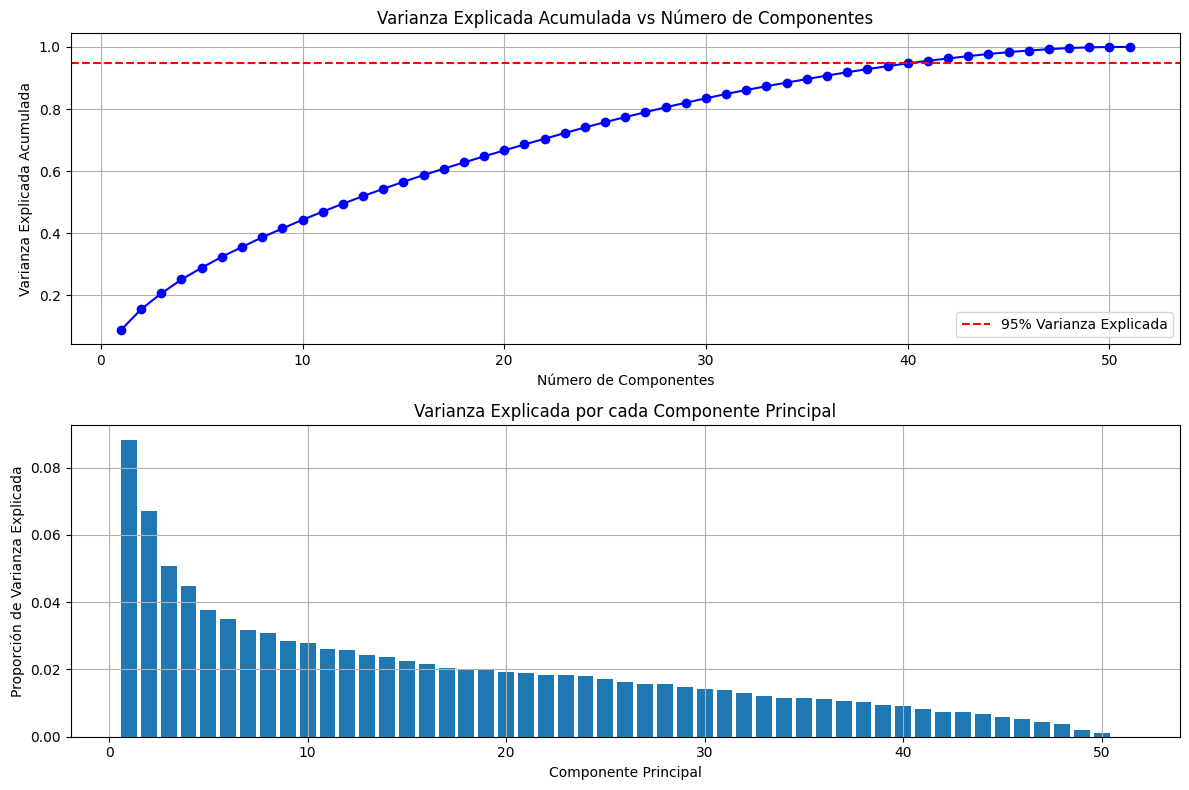


Número de componentes necesarios para explicar el 95% de la varianza: 41


In [12]:
# Separamos los datos antes de 2020 para entrenamiento
datos_pre_2020 = df_concatenado_limpio[df_concatenado_limpio.index.get_level_values('date').year < 2020]
datos_completos = df_concatenado_limpio

# Separamos el target y sector antes
y_train = datos_pre_2020['target_1w']
y_full = datos_completos['target_1w']
sector_train = datos_pre_2020['sector']
sector_full = datos_completos['sector']

# Seleccionamos solo las columnas numéricas
columnas_numericas = datos_pre_2020.select_dtypes(include=['float64', 'int64']).columns
columnas_numericas = columnas_numericas.drop('target_1w')
X_train = datos_pre_2020[columnas_numericas]
X_full = datos_completos[columnas_numericas]

# Estandarizamos los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_full_scaled = scaler.transform(X_full)

# Entrenamos el PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_scaled)

# Calculamos la varianza explicada acumulada
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Graficamos la varianza explicada acumulada
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, 'bo-')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada vs Número de Componentes')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Varianza Explicada')
plt.legend()

# Graficamos la varianza explicada por cada componente
plt.subplot(2, 1, 2)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Componente Principal')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('Varianza Explicada por cada Componente Principal')
plt.grid(True)
plt.tight_layout()
plt.show()

# Imprimimos el número de componentes necesarios para explicar el 95% de la varianza
n_componentes_95 = np.argmax(varianza_acumulada >= 0.95) + 1
print(f"\nNúmero de componentes necesarios para explicar el 95% de la varianza: {n_componentes_95}")

# Transformamos los datos con PCA
X_train_pca = pca.transform(X_train_scaled)
X_full_pca = pca.transform(X_full_scaled)

# Convertimos a DataFrame y añadimos sector y target
X_train_pca_df = pd.DataFrame(X_train_pca, index=X_train.index, 
                             columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])
X_full_pca_df = pd.DataFrame(X_full_pca, index=X_full.index,
                            columns=[f'PC{i+1}' for i in range(X_full_pca.shape[1])])

# Añadimos sector y target
X_train_pca_df['sector'] = sector_train
X_train_pca_df['target_1w'] = y_train
X_full_pca_df['sector'] = sector_full
X_full_pca_df['target_1w'] = y_full



In [13]:
# Guardamos la versión completa
X_full_pca_df.to_hdf('data/assets.h5', 'engineered_features_pca_trimmed')

# Guardamos la versión reducida con 95% de varianza explicada
X_full_pca_df_95 = X_full_pca_df.iloc[:, :n_componentes_95].copy()
X_full_pca_df_95['sector'] = X_full_pca_df['sector'] 
X_full_pca_df_95['target_1w'] = X_full_pca_df['target_1w']
X_full_pca_df_95.to_hdf('data/assets.h5', 'engineered_features_pca_95_trimmed')


/tmp/ipykernel_60720/3689871356.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  X_full_pca_df.to_hdf('data/assets.h5', 'engineered_features_pca_trimmed')
/tmp/ipykernel_60720/3689871356.py:8: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  X_full_pca_df_95.to_hdf('data/assets.h5', 'engineered_features_pca_95_trimmed')


In [14]:
# Guardamos la versión con 10 componentes principales
X_full_pca_df_10 = X_full_pca_df.iloc[:, :10].copy()
X_full_pca_df_10['sector'] = X_full_pca_df['sector']
X_full_pca_df_10['target_1w'] = X_full_pca_df['target_1w']
X_full_pca_df_10.to_hdf('data/assets.h5', 'engineered_features_pca_10_trimmed')


/tmp/ipykernel_60720/4041723984.py:5: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  X_full_pca_df_10.to_hdf('data/assets.h5', 'engineered_features_pca_10_trimmed')


In [15]:
import pandas as pd
df = pd.read_hdf('data/assets.h5', 'engineered_features_pca_trimmed')
df.head()

PC1       PC2       PC3       PC4       PC5       PC6  \
ticker date                                                                     
IYR    2002-02-17 -0.155749  0.189158 -1.178649 -0.979991 -0.156794 -1.102444   
       2002-02-24 -0.084013 -0.217761 -0.662529 -1.205974  0.315117 -0.819656   
       2002-03-03 -0.589314  1.409876 -1.827897 -0.735852 -0.550062 -0.981885   
       2002-03-10 -0.475111  0.761267 -2.370905 -0.616567 -0.239540 -1.394065   
       2002-03-17 -0.262094  0.117398 -1.099284 -0.875131  0.492742 -0.823186   

                        PC7       PC8       PC9      PC10  ...      PC44  \
ticker date                                                ...             
IYR    2002-02-17 -0.480803 -0.627201  0.946229 -0.222529  ... -0.011658   
       2002-02-24  0.152159 -0.472777  1.284863  0.577246  ... -0.232263   
       2002-03-03 -0.203031 -1.978873  0.371122 -0.066318  ... -0.903073   
       2002-03-10 -0.576551 -0.749857  1.101521 -0.511504  ...  0.265165   
       2002-03-17  0.250190 -0.799454  1.113160  0.342164  ... -0.240427   

                       PC45      PC46      PC47      PC48      PC49      PC50  \
ticker date                                                                     
IYR    2002-02-17 -0.196251 -0.164918 -0.029145  0.056134  0.217630  0.013797   
       2002-02-24 -0.141477 -0.175889 -0.022863  0.041963  0.225280  0.029308   
       2002-03-03  0.633026 -0.426950 -0.129119  0.101043  0.091778  0.155101   
       2002-03-10 -0.222101 -0.037645 -0.203614 -0.197112 -0.041359  0.249539   
       2002-03-17 -0.055508  0.216432 -0.085524 -0.261814 -0.056319  0.182017   

                           PC51  sector  target_1w  
ticker date                                         
IYR    2002-02-17 -7.105199e-16     IYR   0.215295  
       2002-02-24 -6.566233e-16     IYR   0.458114  
       2002-03-03 -3.211185e-16     IYR   0.786332  
       2002-03-10 -9.546702e-16     IYR   0.185643  
       2002-03-17 -3.445841e-16     IYR   0.479877  

[5 rows x 53 columns]

In [16]:

X_full_pca_df_95

PC1       PC2       PC3       PC4       PC5       PC6  \
ticker date                                                                     
IYR    2002-02-17 -0.155749  0.189158 -1.178649 -0.979991 -0.156794 -1.102444   
       2002-02-24 -0.084013 -0.217761 -0.662529 -1.205974  0.315117 -0.819656   
       2002-03-03 -0.589314  1.409876 -1.827897 -0.735852 -0.550062 -0.981885   
       2002-03-10 -0.475111  0.761267 -2.370905 -0.616567 -0.239540 -1.394065   
       2002-03-17 -0.262094  0.117398 -1.099284 -0.875131  0.492742 -0.823186   
...                     ...       ...       ...       ...       ...       ...   
XLY    2024-11-17 -1.155334 -0.783127 -0.264531  0.829208  0.951948  1.371124   
       2024-11-24 -1.329447  0.094508 -0.978635  0.869893 -0.159989  0.693245   
       2024-12-01 -1.067233 -1.040532 -0.199652  0.522403 -0.280674  1.140092   
       2024-12-08 -1.337308  0.100238 -1.421049  1.868339  0.037516  0.920403   
       2024-12-15 -1.191625 -0.256030 -0.783153  0.550770  0.086145  0.788425   

                        PC7       PC8       PC9      PC10  ...      PC34  \
ticker date                                                ...             
IYR    2002-02-17 -0.480803 -0.627201  0.946229 -0.222529  ...  0.000583   
       2002-02-24  0.152159 -0.472777  1.284863  0.577246  ... -0.209678   
       2002-03-03 -0.203031 -1.978873  0.371122 -0.066318  ... -0.873970   
       2002-03-10 -0.576551 -0.749857  1.101521 -0.511504  ... -0.269043   
       2002-03-17  0.250190 -0.799454  1.113160  0.342164  ... -0.117008   
...                     ...       ...       ...       ...  ...       ...   
XLY    2024-11-17  0.938888  0.173370  0.857552  1.846735  ... -0.211001   
       2024-11-24 -0.687721  0.450305  0.214570 -0.481597  ...  0.195212   
       2024-12-01  0.032242  0.951935  0.474423  0.733846  ...  0.117182   
       2024-12-08 -0.201729  0.144038  0.096671  1.020254  ...  0.331899   
       2024-12-15 -0.161415  1.385466  0.787125  0.406144  ... -0.346398   

                       PC35      PC36      PC37      PC38      PC39      PC40  \
ticker date                                                                     
IYR    2002-02-17 -0.227001 -0.233826  0.064898  0.478448 -0.675014  0.058765   
       2002-02-24 -0.033571 -0.098513  0.196892  0.477617 -0.442600  0.022536   
       2002-03-03 -0.838015  1.286508 -0.538991  0.011535 -0.891154  0.787421   
       2002-03-10 -0.507639 -0.280467 -0.519016  0.153859 -0.587215 -0.665135   
       2002-03-17 -0.119503  0.024310 -0.364224  0.726492 -0.180292 -0.082945   
...                     ...       ...       ...       ...       ...       ...   
XLY    2024-11-17  0.105578 -0.005898  0.351759 -0.315128  0.667651 -0.198775   
       2024-11-24 -0.558817 -0.713425  0.136537 -0.715561 -0.259077 -0.455552   
       2024-12-01  0.497901  0.030622  0.386757 -0.684049  0.904945 -0.295646   
       2024-12-08  0.045179 -0.263058  0.219776 -0.692208  0.683217 -0.469059   
       2024-12-15 -0.110683 -0.252480  0.497156 -1.317391  0.722464 -1.132140   

                       PC41  sector  target_1w  
ticker date                                     
IYR    2002-02-17  0.406731     IYR   0.215295  
       2002-02-24  0.283166     IYR   0.458114  
       2002-03-03  0.356356     IYR   0.786332  
       2002-03-10  0.424079     IYR   0.185643  
       2002-03-17  0.134814     IYR   0.479877  
...                     ...     ...        ...  
XLY    2024-11-17 -0.324517     XLY   0.921709  
       2024-11-24  0.241435     XLY   0.809070  
       2024-12-01 -0.546796     XLY   1.982427  
       2024-12-08 -0.175176     XLY   0.308457  
       2024-12-15 -0.395107     XLY   0.308457  

[13692 rows x 43 columns]

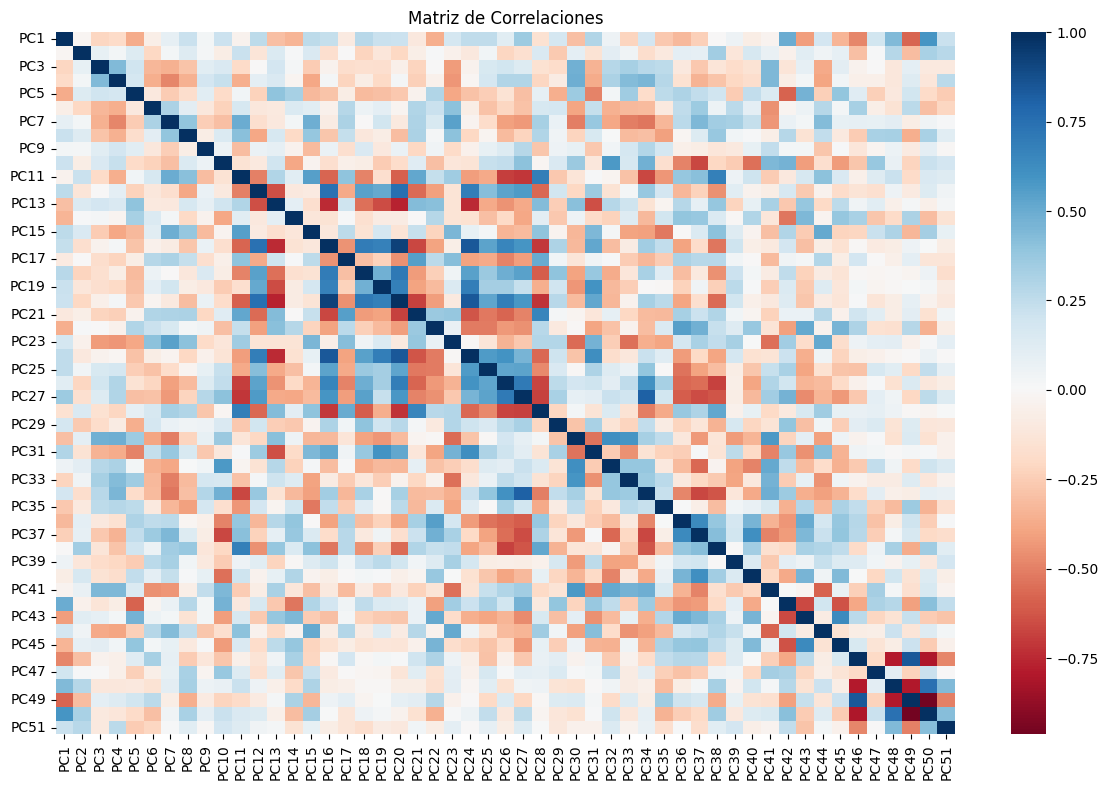


Correlaciones más altas:
PC20  PC16    0.925107
PC24  PC20    0.845383
      PC16    0.844335
PC49  PC46    0.839210
PC34  PC27    0.812951
PC20  PC12    0.754328
PC16  PC12    0.744728
PC50  PC48    0.741330
PC20  PC18    0.709428
PC27  PC26    0.704576
dtype: float64


In [17]:
matriz_correlaciones(X_full_pca_df.drop(columns=['sector', 'target_1w']))
